# Best Neighborhood in Pittsburgh

## Metric
### Average Neighborhood Income 
I am using the average household income of each neighborhood as the metric for determining which neighborhood is the best. The average household income could tell me a lot about a neighborhood's overall living conditions and opportunities. A higher average household income may indicate that residents have access to better-paying job opportunities and housing conditions. Wealthier neighborhoods may correlate to lower crime rates, and better maintained infastructures. Since property taxes often fund education, higher-income neighborhoods would have access to a better public education.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Link to dataset used
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/b119be7e-1c70-4bbe-bf34-2056fef533ec/download/house"

# Data contains my dataset
data = pd.read_csv(url)

#Prints columns
print(data.columns)

Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - Less than $10,000',
       'Margin of Error; Total: - Less than $10,000',
       'Estimate; Total: - $10,000 to $14,999',
       'Margin of Error; Total: - $10,000 to $14,999',
       'Estimate; Total: - $15,000 to $19,999',
       'Margin of Error; Total: - $15,000 to $19,999',
       'Estimate; Total: - $20,000 to $24,999',
       'Margin of Error; Total: - $20,000 to $24,999',
       'Estimate; Total: - $25,000 to $29,999',
       'Margin of Error; Total: - $25,000 to $29,999',
       'Estimate; Total: - $30,000 to $34,999',
       'Margin of Error; Total: - $30,000 to $34,999',
       'Estimate; Total: - $35,000 to $39,999',
       'Margin of Error; Total: - $35,000 to $39,999',
       'Estimate; Total: - $40,000 to $44,999',
       'Margin of Error; Total: - $40,000 to $44,999',
       'Estimate; Total: - $45,000 to $49,999',
       'Margin of Error; Total: - $45,000 to $49,999',

The data set displays the total count of households whose income were recorded or estimated accross Pittsburgh neighborhoods, and presents the distribution of those households across different income ranges. 

Because the income data are presented in ranges, I would use the midpoint in order to develop a method of comparison. This approach would also minimize the impact of outliers, giving me a more accurate estimate of the typical household income in each neighborhood.

In [5]:
midpoints = {
    "Estimate; Total: - Less than $10,000": 5000,
    "Estimate; Total: - $10,000 to $14,999": 12500,
    "Estimate; Total: - $15,000 to $19,999": 17500,
    "Estimate; Total: - $20,000 to $24,999": 22500,
    "Estimate; Total: - $25,000 to $29,999": 27500,
    "Estimate; Total: - $30,000 to $34,999": 32500,
    "Estimate; Total: - $35,000 to $39,999": 37500,
    "Estimate; Total: - $40,000 to $44,999": 42500,
    "Estimate; Total: - $45,000 to $49,999": 47500,
    "Estimate; Total: - $50,000 to $59,999": 55000,
    "Estimate; Total: - $60,000 to $74,999": 67500,
    "Estimate; Total: - $75,000 to $99,999": 87500,
    "Estimate; Total: - $100,000 to $124,999": 112500,
    "Estimate; Total: - $125,000 to $149,999": 137500,
    "Estimate; Total: - $150,000 to $199,999": 175000,
    "Estimate; Total: - $200,000 or more": 225000
}

Here, I create a dictionary called midpoints storing the monentary value I assign to each range.

In [6]:
# Creates a new column called "Weighted income" and stores total estimated income for all households in every neighborhood
# by taking the number of households in every range ([data[col]) & multiplying it by the assigned value in the dictionary
data["Weighted Income"] = sum(data[col] * midpoint for col, midpoint in midpoints.items())

# Creates a new column "Average Income" and stores the average household income for every neighborhood 
data["Average Income"] = data["Weighted Income"] / data["Estimate; Total:"]

# Creates a new dataframe with the two columns "Neighborhood" and "Average Income" and sorts them by descending order
sorted_df = data[["Neighborhood", "Average Income"]].sort_values(by="Average Income", ascending=False)

# Formats the numbers in "Average Income" to look like dollar amounts
sorted_df["Average Income"] = sorted_df["Average Income"].apply(lambda x: f"${x:,.2f}")

# Removes row numbers for cleaner look
print(sorted_df.to_string(index=False))

             Neighborhood Average Income
      Squirrel Hill North    $117,421.36
             Point Breeze    $109,053.16
           Strip District    $108,605.77
            Regent Square     $98,198.53
Central Business District     $88,531.50
           Allegheny West     $85,085.62
      Squirrel Hill South     $79,884.20
              North Shore     $78,685.06
                Fairywood     $78,148.36
              South Shore     $77,500.00
            Highland Park     $76,135.37
           Swisshelm Park     $74,371.75
            New Homestead     $73,614.78
         Duquesne Heights     $73,433.76
              Summer Hill     $70,531.91
               Greenfield     $70,263.23
                Shadyside     $68,636.42
               Banksville     $68,272.10
                  Chateau     $67,500.00
         South Side Flats     $66,985.05
          Stanton Heights     $63,162.69
              Perry North     $62,627.69
                 Westwood     $62,526.81
         Brighto

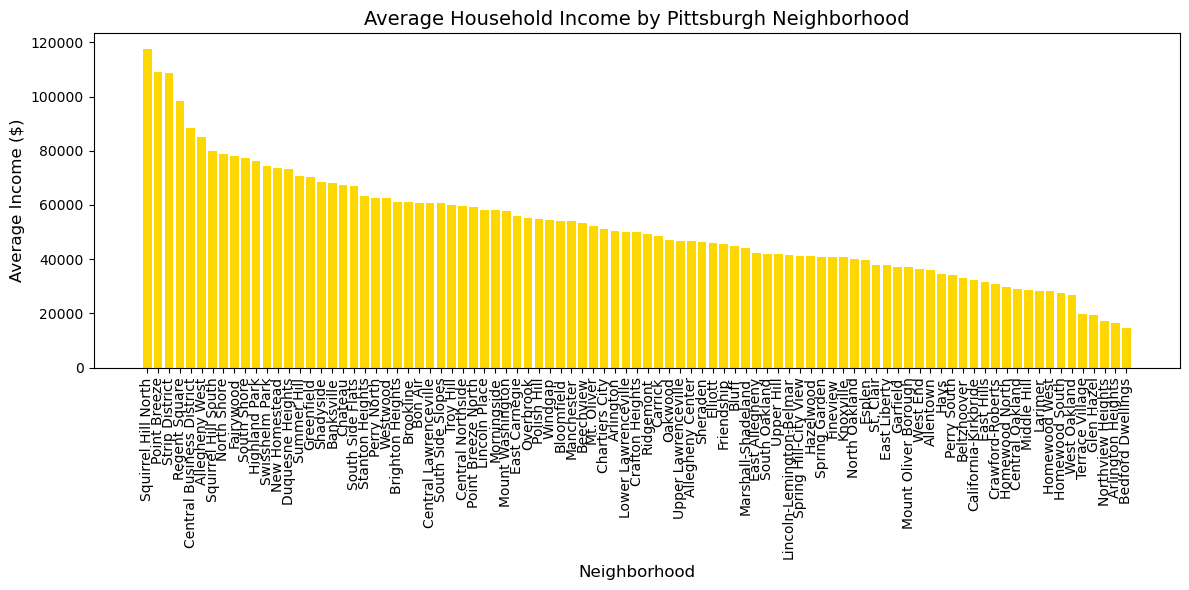

In [9]:
# Removes the money sign and commans from the average income column in order to sort it numerically 
sorted_df["Average Income"] = sorted_df["Average Income"].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(12, 6))
# Creates bar charts with corresponding x and y axis 
plt.bar(sorted_df["Neighborhood"], sorted_df["Average Income"], color="gold")
# Creates bar chart title
plt.title("Average Household Income by Pittsburgh Neighborhood", fontsize=14)
# Labels the x-axis
plt.xlabel("Neighborhood", fontsize=12)
# Labels the y-axis
plt.ylabel("Average Income ($)", fontsize=12)
# Rotates neighborhood names by 90 degrees
plt.xticks(rotation=90)
# Adjusts labels
plt.tight_layout()
# Displays bar chart
plt.show()

In conclusion, by using my metric, the top 10 best neighborhoods to live in for families would be 

In [9]:
sorted_df.head(10)

,Neighborhood,Average Income
76,Squirrel Hill North,"$117,421.36"
63,Point Breeze,"$109,053.16"
80,Strip District,"$108,605.77"
66,Regent Square,"$98,198.53"
16,Central Business District,"$88,531.50"
1,Allegheny West,"$85,085.62"
77,Squirrel Hill South,"$79,884.20"
57,North Shore,"$78,685.06"
31,Fairywood,"$78,148.36"
71,South Shore,"$77,500.00"


With the top 10 worst neighborhoods being

In [13]:
sorted_df.tail(10).sort_values(by="Average Income", ascending=True)

,Neighborhood,Average Income
6,Bedford Dwellings,"$14,668.05"
4,Arlington Heights,"$16,597.22"
58,Northview Heights,"$17,078.43"
35,Glen Hazel,"$19,574.69"
83,Terrace Village,"$19,933.81"
88,West Oakland,"$26,777.78"
41,Homewood South,"$27,636.32"
42,Homewood West,"$28,246.17"
44,Larimer,"$28,412.58"
50,Middle Hill,"$28,836.39"


# Thank you for your time!

![gif](https://external-preview.redd.it/FADtPOq2V-3rXj6ol5DE_nj7UJZrehTUOpqGuzXXioQ.gif?auto=webp&s=58bbe826e7fc820cb321b03a466361256049f4da)